## 1 Author
Student Name: Meriam saad kharchef

Student ID: 221055119

## 2 Problem formulation

Thanks to the contribution of all students we manage to gather more than 2000 sound data sets. by filming in diffrent spots/locations through out london indoors and outdoors. With the type of data collected and labelled, a classification problem would best serve the purpose of the dataset.

coming to the basic solution. we need to build a Machine Learning model or pipeline that takes as an input an audio segment and predicts whether the audio segment has been recorded indoors or outdoors.

in order to find a solution for this problem we will need to work with some feutures like need to extract some features

what intrests me the most about this is that we will be able to produce a model that will be able to detect if a sound is indoors or outdoors which amazing just imagine having an app that can tell you the location of a place or if its indoors outdoors just by the sound.

## 3 Machine Learning pipeline

Now coming to the machine learning pipeline at first, we get our sample data. When we have our raw data, we might notice some files are corrupted or have bad structure, so it is better to remove these files this is “called data cleaning”. Then we will extract the features that are the input to the model. Then we train our data by splitting it. We can use different ML models and compare to see which one gives best/accurate results. 

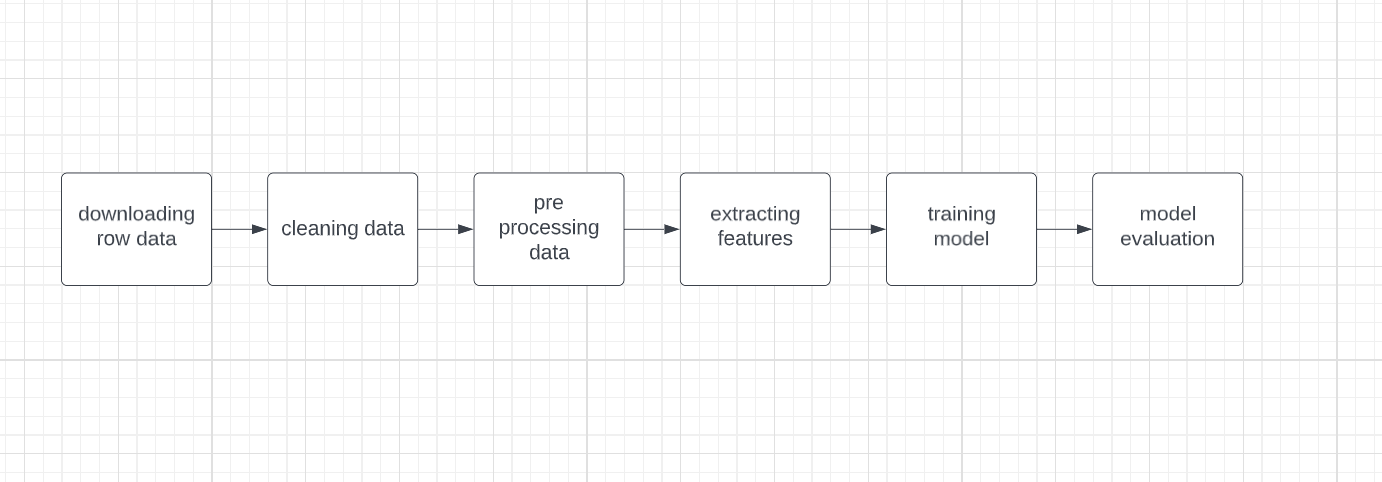

## 4 Transformation stage

In order to build ML pipeline that takes an input an audio segment and predicts whether the audio segment has been recorded indoors or outdoors. We will be using the following features:
Power, Pitch mean, Pitch standard deviation, MFCC and chromagram.


## 5 Modelling

### First model (SVM): 
Support vector machine
The first model I applied was the SVM model. The concept of support vector machine is basic the algorithm makes a line that divides our chosen data into classes. We can find this in the sklearn library, and it can be imported and be implemented 

###Second model: Random forest classifier:
The random forest classifier is a classifiair that has  several decisions trees in different subsets  of the data set. It improves predictability of the data set  by taking the average.






## 6 Methodology

In order to train out model we need to split our data by splitting 80% this is sone by using “train_test_split” and for the validation we will be using the other 20% of the remaining data. 
When we are done with the feature extraction our data will be passed through the models.
Now when the models are trained, we will be using theses models to make the predictions on the validated data. In order to evaluate the performance of our model we will be implementing the accuracy measure. So, in order to have a better view of the model we will print out the confusion matrix 


## 7 Dataset






### Importing libraries and loading the data 


In [2]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa
import random

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sample_path = '/content/drive/MyDrive/Data2/indoors_outdoors/indoors_outdoors/*.wav'
files = glob.glob(sample_path)
len(files)

542

# Data cleaning 

## removing corrupted files:
We are going to be using our data from MLEnd London Sounds dataset for indoors and outdoors environment. This data is uploaded to my google drive and it will be extracted from the drive. When going through the data it has come to my notice that some of the audio files where corrupted/malformed, so we had to remove them in order for the process to work. These files will degrade performance of the model. Therefore data cleaning is very important step to go through while building a machine learning pipeline 

In order to proceed to the next step i have manually removed all the files that were causing some problems in my google drive folder.

## Loading the CSV file 

In [5]:
MLENDLS_df = pd.read_csv('./MLEndLS.csv').set_index('file_id') 
MLENDLS_df

,area,spot,in_out,Participant
file_id,,,,
0001.wav,british,street,outdoor,S151
0002.wav,kensington,dinosaur,indoor,S127
0003.wav,campus,square,outdoor,S18
0004.wav,kensington,hintze,indoor,S179
0005.wav,campus,square,outdoor,S176
...,...,...,...,...
2496.wav,westend,trafalgar,outdoor,S151
2497.wav,campus,square,outdoor,S6
2498.wav,westend,national,indoor,S96


the unique values in all columns of our CSV file

In [6]:
for col in MLENDLS_df:
  print(MLENDLS_df[col].unique())

['british' 'kensington' 'campus' 'westend' 'Euston' 'southbank']
['street' 'dinosaur' 'square' 'hintze' 'piazza' 'upper' 'canal'
 'forecourt' 'greatcourt' 'reception' 'leicester' 'waterloo' 'room12'
 'pond' 'national' 'library' 'skate' 'market' 'book' 'ground' 'charing'
 'trafalgar' 'curve' 'ritblat' 'bridge' 'marine' 'food' 'albert'
 'cromwell' 'gardens' 'royal' 'room13']
['outdoor' 'indoor']
['S151' 'S127' 'S18' 'S179' 'S176' 'S89' 'S140' 'S20' 'S131' 'S69' 'S39'
 'S136' 'S66' 'S145' 'S99' 'S137' 'S73' 'S55' 'S82' 'S105' 'S181' 'S3'
 'S101' 'S41' 'S52' 'S157' 'S143' 'S162' 'S115' 'S72' 'S102' 'S144' 'S27'
 'S111' 'S49' 'S126' 'S59' 'S12' 'S57' 'S67' 'S58' 'S60' 'S48' 'S150'
 'S117' 'S164' 'S13' 'S56' 'S94' 'S29' 'S116' 'S36' 'S81' 'S166' 'S107'
 'S68' 'S65' 'S54' 'S71' 'S148' 'S170' 'S87' 'S35' 'S189' 'S50' 'S17'
 'S90' 'S124' 'S9' 'S92' 'S1' 'S177' 'S62' 'S167' 'S183' 'S190' 'S133'
 'S110' 'S43' 'S31' 'S51' 'S152' 'S75' 'S193' 'S25' 'S40' 'S121' 'S47'
 'S141' 'S79' 'S4' 'S14' 'S165'

## 8 Results

plotting the signal for one of our audio

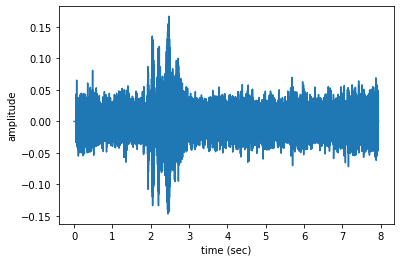

In [7]:
n=0
fs = None # Sampling frequency
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

checking if the plotted signal agreees with the values shown in the MLENDLS_df dataframe

In [8]:
MLENDLS_df.loc[files[n].split('/')[-1]]

area            Euston
spot           library
in_out          indoor
Participant        S93
Name: 2269.wav, dtype: object

## setting the feature and Extracting the features from the data 

In [9]:
n=0
x, fs = librosa.load(files[n],sr=fs)
print('This audio signal has', len(x), 'samples')

This audio signal has 350154 samples


this function below will Create a function to extract the pitch of an audio file

In [10]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

The function below will attach true labels for indoor audio and false labels for outdoor audio 
The label matrixx will an array that has true and false values that indicate indoor or outdoor sample 


In [11]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = labels_file.loc[fileID]['in_out']=='indoor'  # Appending the true label as indoor

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file, res_type='kaiser_fast') #loading our files into an audio signal
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

   
    hop_length = 512
    chromagram = np.mean(librosa.feature.chroma_stft(x, sr=fs, hop_length=hop_length).T)
    mel = np.mean(librosa.feature.melspectrogram(x,sr=fs).T,axis=0)
    xi = [pitch_mean,pitch_std,voiced_fr,chromagram]
    mfccs = np.mean(librosa.feature.mfcc(y=x, sr=fs, n_mfcc=5).T,axis=0)
    #mfccs = np.append(mfccs,mel)
    new = np.append(xi,mfccs)
    y.append(yi)
    X.append(new)
  return np.array(X),np.array(y)

Extracting features in array x and lables to array y by using getXy function that we made in the last step  

In [12]:

X,y = getXy(files, labels_file=MLENDLS_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 542/542 [14:56<00:00,  1.65s/it]


The next cell shows the shape of X and y and prints the labels vector y:

In [13]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)

The shape of X is (542, 9)
The shape of y is (542,)
The labels vector is [ True False False  True False  True False  True  True False  True False
 False  True False False False  True  True  True False False False False
  True  True  True False  True False  True False False  True False  True
  True  True False  True False  True  True False False  True False  True
 False False False  True False False  True  True False  True False  True
  True  True  True  True False False  True  True  True False  True  True
  True False  True  True False False  True False  True  True False  True
  True False False False False  True  True False False False False False
  True  True False  True False False False False  True  True False False
  True  True  True  True False False  True  True False False  True  True
  True  True False  True  True False False False  True  True False  True
 False  True  True False False False  True  True False False False  True
 False  True  True False  True  True  True False Fa

In [14]:
print(' The number of indoor recordings is ', np.count_nonzero(y))
print(' The number of outdoor recordings is ', y.size - np.count_nonzero(y))

 The number of indoor recordings is  262
 The number of outdoor recordings is  280


# Comparing diffrent ML models performance 

## First SVM:

### firstly we are Splitting our data into 80% train and 20% test size.

In [15]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
X_train.shape, X_val.shape, y_train.shape, y_val.shape
X_train[0]

array([ 1.58435495e+02,  6.83842334e+00,  7.28476821e-02,  4.60080594e-01,
       -1.37269531e+02,  1.21496666e+02, -2.46483898e+01,  3.14773636e+01,
       -1.34699497e+01])

In [16]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0],-1)

In [17]:
model  = svm.SVC(C=9)
model.fit(X_train,y_train)
import pickle

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.7251732101616628
Validation  Accuracy 0.6238532110091743
The support vectors are (313, 9)


 We can see the validation and training of the SVM model is complete. We set the value for C=9 which gives us the following results:

Training accuracy: 72%

Validation accuracy: 66%

So far the model preformed decently. In the next step we are going to see the results after normalising our data.


Normalizing our data and observing a change in the accuracy

In [18]:
mean = X_train.mean()
sd =  X_train.std()

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train,y_train)

yt_pn = model.predict(X_train)
yv_pn = model.predict(X_val)

print('Training Accuracy', np.mean(yt_pn==y_train))
print('Validation  Accuracy', np.mean(yv_pn==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.7829099307159353
Validation  Accuracy 0.6146788990825688
The support vectors are (337, 9)


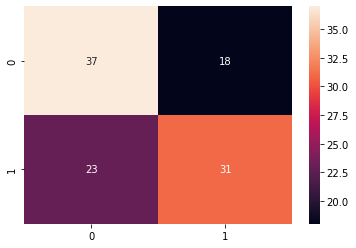

In [28]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_val, yv_p)
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)

## Second RANDOM FOREST CLASSIFIER 

In [19]:
from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(max_depth=6, random_state=45) 
clf = RandomForestClassifier(max_depth=18, random_state=50)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=18, random_state=50)

In [20]:
yt_p1 = clf.predict(X_train)
yv_p1 = clf.predict(X_val)
print('Training Accuracy', np.mean(yt_p1==y_train))
print('Validation  Accuracy', np.mean(yv_p1==y_val))

Training Accuracy 1.0
Validation  Accuracy 0.7339449541284404


In [21]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_val, yv_p1)

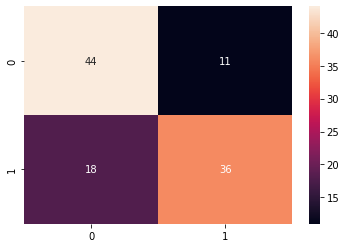

In [23]:
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)

# K Nearest Neighbors

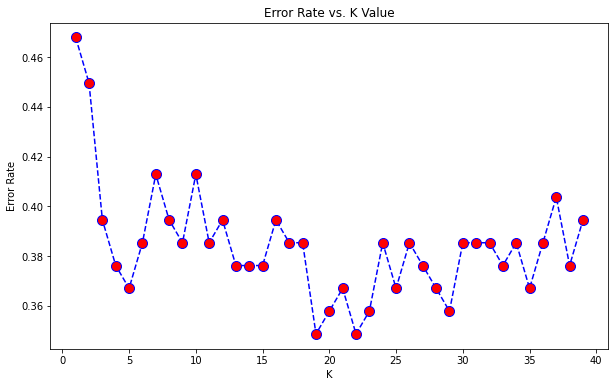

In [24]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

# plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [26]:
# now using the model with the optimal n_neighbors
knn = KNeighborsClassifier(n_neighbors=14)
# fitting
knn.fit(X_train, y_train)
# predicting
yt_p = knn.predict(X_train)
yv_p = knn.predict(X_val)

# results
print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('\n')


Training Accuracy 0.7413394919168591
Validation  Accuracy 0.6238532110091743




# 9 Conclusions

In [27]:
import pandas as pd

data = [['SVM',np.mean(yt_p == y_train), np.mean(yv_p == y_val)], ['knn',np.mean(yt_p==y_train), np.mean(yv_p==y_val)], ['Random Forrest',np.mean(yt_p1==y_train), np.mean(yv_p1==y_val)]]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Classifier', 'Performance Training', 'Performance Testing'])

# print dataframe.
df

,Classifier,Performance Training,Performance Testing
0,SVM,0.741339,0.623853
1,knn,0.741339,0.623853
2,Random Forrest,1.000000,0.733945


In conclusion we have tested/evaluated 3 classifiers that are Support Vector Machine, K-Nearest Neighbours(KNN) and Random Forest Classifier we fitted these models to the training sets that is constructed from our features that were taken from our data set. When validating the model using random forest classifier and it gave highest validation accuracy as we can see in the table above 
We can see the random forest classifier performed better than SVM but that doesn’t mean it is the best classifier we can try experiment with others like K-Nearest Neighbours(KNN), Logistic Regression Classifier or MLP classifier.
